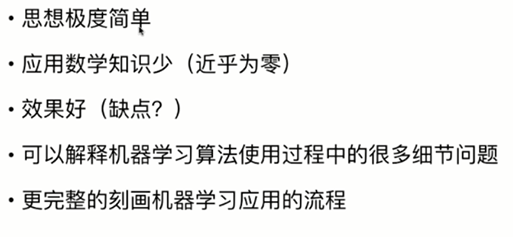

### 肿瘤问题

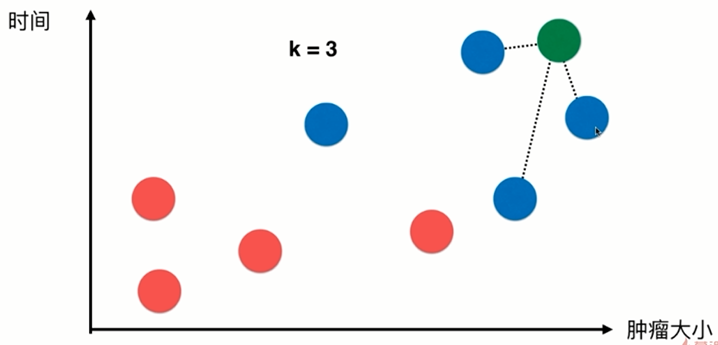

假设k=3,对于每一个新来的点，寻找离这个点最近的三个点，都是

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
raw_data_x = np.random.random(20).reshape(10,2)

In [4]:
raw_data_x

array([[0.69022375, 0.6256411 ],
       [0.11227878, 0.18518926],
       [0.50714046, 0.10176866],
       [0.61829322, 0.17576982],
       [0.98434883, 0.43160998],
       [0.55380028, 0.4994706 ],
       [0.04800334, 0.29855081],
       [0.01482868, 0.69724535],
       [0.90878846, 0.9315739 ],
       [0.98770256, 0.40977897]])

In [5]:
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [6]:
x_train = raw_data_x
y_train = np.array(raw_data_y)

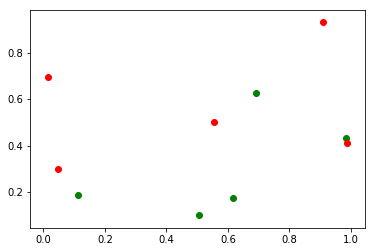

In [7]:
plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1],color='g')
plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1],color='r')

In [8]:
x = np.array([8.096907318,3.365731514])

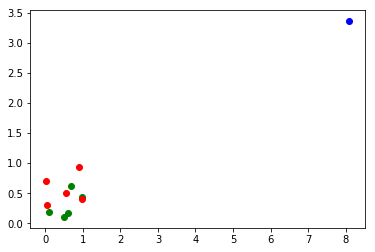

In [10]:
plt.scatter(x_train[y_train==0,0], x_train[y_train==0,1],color='g')
plt.scatter(x_train[y_train==1,0], x_train[y_train==1,1],color='r')
plt.scatter(x[0],x[1],color='b')

### KNN的过程
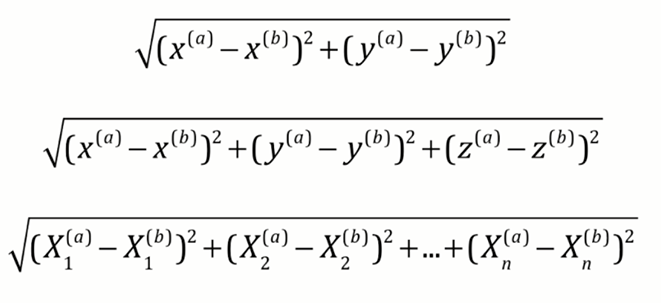

缩减版
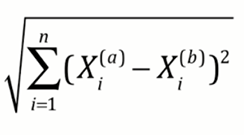

In [11]:
from math import sqrt
distances = []
for _x_train in x_train:
    d = sqrt(np.sum((_x_train - x)**2))
    distances.append(d)

In [12]:
distances

[7.897281618311827,
 8.594774110756306,
 8.261840867668193,
 8.130530395694134,
 7.693994891781192,
 8.069319387736572,
 8.613504092420014,
 8.51121692644654,
 7.589082687789232,
 7.699249820081698]

上面的代码尅一使用生成表达式一步搞定

In [13]:
distances = [sqrt(np.sum((_x_train - x)**2)) for _x_train in x_train]

In [14]:
distances

[7.897281618311827,
 8.594774110756306,
 8.261840867668193,
 8.130530395694134,
 7.693994891781192,
 8.069319387736572,
 8.613504092420014,
 8.51121692644654,
 7.589082687789232,
 7.699249820081698]

获取里_x_train最近的点的下标

In [15]:
np.argsort(distances)

array([8, 4, 9, 0, 5, 3, 2, 7, 1, 6], dtype=int64)

In [16]:
nearest = np.argsort(distances)
k = 6

In [17]:
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 0, 1, 0, 1, 0]

In [18]:
from collections import Counter
Counter(topK_y)

Counter({1: 3, 0: 3})

对数的频次进行统计

In [19]:
votes = Counter(topK_y)

找出票数最多的元素

In [20]:
votes.most_common(1)

[(1, 3)]

In [22]:
votes.most_common(1)[0][0]

1

In [23]:
predict_y = votes.most_common(1)[0][0]

In [24]:
predict_y

1